# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
tf.__version__

'2.3.1'

# Data Preprocessing 

### Training set [DATA SET](https://drive.google.com/drive/folders/1R1eyz1Ddh6jwDFsByN-JhHc7NM7fIGEr?usp=sharing)

In [3]:
train_DataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_DataGen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_DataGen = ImageDataGenerator(rescale = 1./255)
test_set = test_DataGen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# Building the CNN

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN

In [12]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 51s 203ms/step - loss: 0.6699 - accuracy: 0.5744 - val_loss: 0.5979 - val_accuracy: 0.6840
Epoch 2/25
250/250 [==============================] - 50s 201ms/step - loss: 0.5918 - accuracy: 0.6864 - val_loss: 0.5546 - val_accuracy: 0.7210
Epoch 3/25
250/250 [==============================] - 48s 192ms/step - loss: 0.5526 - accuracy: 0.7136 - val_loss: 0.5087 - val_accuracy: 0.7500
Epoch 4/25
250/250 [==============================] - 49s 194ms/step - loss: 0.5167 - accuracy: 0.7424 - val_loss: 0.5406 - val_accuracy: 0.7435
Epoch 5/25
250/250 [==============================] - 49s 195ms/step - loss: 0.4925 - accuracy: 0.7615 - val_loss: 0.4738 - val_accuracy: 0.7785
Epoch 6/25
250/250 [==============================] - 48s 193ms/step - loss: 0.4726 - accuracy: 0.7759 - val_loss: 0.4783 - val_accuracy: 0.7770
Epoch 7/25
250/250 [==============================] - 49s 197ms/step - loss: 0.4595 - accuracy: 0.7887 - val_loss: 0.4643 - val_ac

# Single Prediction

In [14]:
import numpy as np
from keras.preprocessing import image

In [15]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

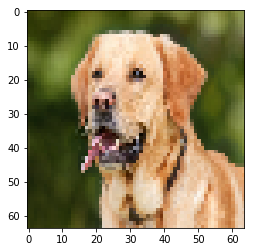

In [17]:
plt.imshow(test_image)

In [18]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [19]:
print(prediction)

dog
